# **深度学习公开课 - 深度学习中的时间序列算法群**

> 作者：@菜菜TsaiTsai<br>
> 发行日期：2023/12/18<br>

**<center><font color ="k" size=6>Day7 Informer算法预测实战<br>节选自《深度学习实战》第7期正课<center>**<br>**<center><font color ="red" size=6>直播将于8点半正式开始！<br>扫码回复"DL999"领取今日直播课件/思维导图>>>**<br><br>**<center><font color ="red" size=6>双12钜惠返场进行中！<br>惊爆底价+万元福利赠送，最后10个名额！<br>扫码回复"优惠"抢双12最后名额吧！<br>>>></font></center>**

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/LSTM/%E8%AF%BE%E7%A8%8B%E5%AE%A3%E4%BC%A05.png)

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/LSTM/%E8%AF%BE%E7%A8%8B%E5%AE%A3%E4%BC%A06.png)

# 目录

**一、认识Informer Github库**

&emsp;&emsp;1. Informer2020库的安装部署

&emsp;&emsp;2. Informer2020库的基本结构与调用指南

**二、Informer实践时序预测的实战**

&emsp;&emsp;1. Attention计算改进<br>

&emsp;&emsp;2. Encoder结构改进

&emsp;&emsp;3. Decoder结构改进

&emsp;&emsp;4. 位置编码改进

# 一、认识Informer2020

Informer算法是深度学习领域的一项重要创新，特别针对处理长序列时间序列数据而设计。作为传统Transformer模型的一个高效改进，Informer主要通过引入概率稀疏注意力机制（ProbSparse Self-Attention）来解决处理长序列时的效率和性能问题。这种机制使得Informer在保持出色性能的同时，大幅减少了对计算资源的需求。此外，Informer采用了一种独特的序列下采样策略，有效地减少了序列的长度，从而进一步提升了处理长序列的能力。为了捕捉时间序列中的长期依赖关系，Informer还引入了多尺度时间编码技术，使得模型能够同时理解短期和长期的时间动态。

Informer的这些创新特性使其在处理长时间序列方面表现卓越，特别适用于那些需要分析和预测长时间序列数据的领域，如金融、气象和交通等，Informer也因此成为各大深度学习竞赛中的常客。作为新兴算法，Informer目前还没有被大型深度学习框架、如PyTorch、TensorFlow等框架收录为成熟算法，因此我们无法直接从这些深度学习框架中对informer进行调用，因此现在我们想要实现informer有三个途径——

1. 使用PyTorch或TensorFlow自建informer架构，并使用传统深度学习框架的预测手段进行预测
2. 使用由网友开源在Huggingface的informer模型架构
3. 使用Informer原作者在Github上发布的[Informer2020开源项目](https://github.com/zhouhaoyi/Informer2020)

在这三种手段当中，直接调用原作者所开发的开源项目是最为辩解的。Informer架构的数学过程及其复杂，要使用PyTorch来实现工程量很大，而Huggingface调用需要魔法，因此我们更常使用原作者自己开发的informer开源项目。遗憾的是，原作者们并没有像开发成熟的深度学习框架一样开发informer，该项目不是为了大幅推广informer架构的使用、而更多是为了让学术界更容易地复现informer论文的结果，因此informer2020项目的调用略微复杂，代码本身封装程度较低、调用方式不够简洁、有许多不够灵活的地方，在许多应用场景中甚至需要修改源码，因此informer开源项目本身有一定的使用门槛。今天就让我们一起来看一下这个库。

![](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/github.png)

作为Github上的开源项目，Informer2020库可以通过git直接克隆并部署到本地，你也可以直接可以点击右上角的绿色的Code按钮，通过“Download ZIP”方式下载整个项目的压缩包（如果你没有办法下载这个开源项目的压缩包的话，可以直接vx扫码→回复“DL999”来获取该zip文件）。

该文件夹解压后，可以直接在本地使用PyCharm、VScode等编程工具打开运行。如果你使用的是jupyterlab，则只需要在解压后的文件夹中新建ipy或py文件，即可直接运行这个开源项目的代码。需要注意的是，这一整套代码并没有被封装成一个完整的库，而是以零散的模块形式呈现，因此我们在进行导入的时候，只需导入各个零散的模块名称下的函数、类等功能即可，并不需要导入一个库的名称，也不需要额外对库进行安装。

看下面这张图，这张图中包含了informer2020项目中的几大核心板块：

![git项目结构](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/%E9%A1%B9%E7%9B%AE%E7%BB%93%E6%9E%84.png)![项目结构细化](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/%E9%A1%B9%E7%9B%AE%E7%BB%93%E6%9E%84%E7%BB%86%E5%8C%96.png)

这个项目是基于Python和PyTorch完成编程的。我们来大致看一下这个项目结构里重要的几部分：

* 一般主程序入口都会放在主文件夹下，**main_informer.py就是我们的主程序**。该主程序可以帮助定义informer所需的所有参数、并执行实际的训练和预测流程。在PyCharm等非REPL式的编程工具中，我们都可以通过直接调用main_informer来运行算法的训练。

* **data板块**：包含一切和数据有关，存放数据集和数据集加载相关代码，核心代码为data_loader.py，既包括处理数据的代码，也包括导入数据的代码。深度学习的数据加载是一个相对复杂的流程，在《深度学习实战》正课中我们仔细得讲解过导入不同数据所使用的类CustomDataset，在informer2020中我们也同样使用这样的类来导入数据。考虑到深度学习数据存在的形式丰富，原作者们很贴心地为我们准备了可以导入论文中使用的数据的三个类（例如`Dataset_ETT_hour`），每个类对应不同的数据集。同时，也为我们写了一个可以导入excel表单/csv文件的类，并附有自动分割训练/测试/验证集的流程、以及将导入数据转变为Tensor的流程（`Dataset_Custom`，`Dataset_Pred`等）。在实际使用informer2020库的时候，我们也可以自己向dataloader.py中添加自己定义的数据导入类。而处理数据的代码部分，包括有归一化、各类embedding的选择等等。

* **exp板块**：实验相关，数据加载，模型训练、测试、预测的过程代码，包括了定义损失函数、定义网络结构、进行训练等神经网络的基本流程。

* **models板块**：Informer模型相关内容，包含词向量编码（embed.py）、注意力机制（attn.py）、encoder编码器（encoder.py）、decoder（decoder.py）解码器和模型定义（model.py）几部分。

* **utils板块**：与项目相关的辅助代码，这里包含掩码相关（masking.py）、算法衡量指标（metrics.py）、时间特征（timefreatures.py）和其它工具（tools.py）几部分。

在Informer的论文当中，实验还用到了[电力变压器的数据集](https://github.com/zhouhaoyi/ETDataset)。这里github直接下载的zip里的data目录下没有这个数据集，我们在今日直播课件中为你准备了相应的数据集，你可以vx扫码→回复“DL999”来获取该数据集）。

在上述代码中，几乎所有板块下的功能都是通过类的方式实现的，但在实际使用informer的过程中，我们往往不会直接导出类或函数来使用，而是通过**设置参数**的方式来调用整个项目中的功能。举例说明，当我们真正在调用informer的时候我们使用的是如下的代码：

In [2]:
# 注意此段代码为展示，不可运行

# 导入相应的库
import argparse
import os
import torch
from exp.exp_informer import Exp_Informer as Exp  # 执行训练流程的板块

# 告诉argparse库我们是需要往informer里面添加参数，并建立一个对象parser用于存储参数
parser = argparse.ArgumentParser(description="[Informer] Long Sequences Forecasting")

# 使用add_argument功能来添加实际要使用的参数，其中'--model'是参数的名称
parser.add_argument("--model")

# 将参数列表parser赋予具体的值，这些值会被保存在模型中形成一个个self.参数值
# 这一步就相当于一般网络调用过程中为模型填写参数的部分
args = parser.parse_args(
    args=["--model", "informer", "--data", "ETTh1", "--attn", "prob", "--freq", "h"]
)

# 按照informer要求的格式将这些值赋予变量setting，代表我们为模型做的各种设置
setting = (
    "{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_{}".format(
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.attn,
        args.factor,
        args.embed,
        args.distil,
        args.des,
    )
)

# 使用Exp实例化网络结构和训练流程的所有参数
exp = Exp(args)

# 训练 + 打印结果
print(">>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>".format(setting))
exp.train(setting)

# 测试 + 打印结果
print(">>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<".format(setting))
exp.test(setting)

usage: ipykernel_launcher.py [-h] [--model MODEL]
ipykernel_launcher.py: error: unrecognized arguments: --data ETTh1 --attn prob --freq h


SystemExit: 2

不难发现，在这个过程中所有的流程都是被封装好的，我们数据的预处理、数据配置、模型选择、模型结构、模型输入输出、训练过程中的学习率、batch_size等等信息全都是通过参数来控制的，甚至连数据的导入都是以参数的形式进行，我们需要修改的只有参数本身而已。如上所述的封装让我们可以很轻易地跑通原作者提供的这一套代码，但是当我们需要更大的灵活性、需要对数据有更多丰富的操作的时候，就需腰修改informer2020的压缩文件中的原始代码了。在Informer2020的结构中有如下的参数——

![](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/Informer%E5%8F%82%E6%95%B0%E6%80%9D%E7%BB%B4%E5%AF%BC%E5%9B%BE.png)

其中最为关键的参数如下——

- **指定输入的数据和预测细节的参数**

In [ ]:
# 想要用官方定义的方法还是你自己的数据集进行定义数据加载器，如果是自己的数据集就输入custom
parser.add_argument("--data", type=str, required=True, default="ETTh1", help="data")
# 数据集文件的路径，不要到具体的文件，到目录级别即可
parser.add_argument(
    "--root_path", type=str, default="./data/ETT/", help="root path of the data file"
)
# 数据集文件的名称
parser.add_argument("--data_path", type=str, default="ETTh1.csv", help="data file")
# 特征有三个选项M，MS，S。分别是多元预测多元，多元预测单元，单元预测单元
parser.add_argument(
    "--features",
    type=str,
    default="M",
    help="forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate",
)
# 数据集中想要预测那一列数据名称，指定标签
parser.add_argument(
    "--target", type=str, default="OT", help="target feature in S or MS task"
)
# 时间的间隔，数据集每一条数据之间的时间间隔，默认为小时，可以自己设定秒，年，月，日，周等
parser.add_argument(
    "--freq",
    type=str,
    default="h",
    help="freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h",
)

- **进一步影响预测进度的参数，需要根据数据的特性来设置**

In [ ]:
# 用过去的多少条数据来预测未来的数据，也就是encoder输入序列的长度
parser.add_argument(
    "--seq_len", type=int, default=96, help="input sequence length of Informer encoder"
)
# Decoder中输入的没有掩码部分序列长度
parser.add_argument(
    "--label_len", type=int, default=48, help="start token length of Informer decoder"
)
# 预测未来多少个时间点的数据，Decoder输入中用0掩码的序列长度
parser.add_argument(
    "--pred_len", type=int, default=24, help="prediction sequence length"
)
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

需要根据数据集的特征数量和前面features的设定来配合设置

In [ ]:
# 输入数据的特征数量，要减去时间的那一列，encoder和decoder是一样的
parser.add_argument("--enc_in", type=int, default=7, help="encoder input size")
parser.add_argument("--dec_in", type=int, default=7, help="decoder input size")

# 输出数据的维度
# 如果features填写的是M那么和上面就一样，是数据列数，如果填写的MS那么这里要输入1因为你的输出只有一列数据。
parser.add_argument("--c_out", type=int, default=7, help="output size")

- **指定网络架构的参数**

In [ ]:
# 编码器中使用的注意力类型，默认为"prob"论文的主要改进点，提出的注意力机制
parser.add_argument(
    "--attn",
    type=str,
    default="prob",
    help="attention used in encoder, options:[prob, full]",
)
# 设置注意力机制中的d_model，默认值为512。可以根据需要调整该参数的数值来改变模型的维度
parser.add_argument("--d_model", type=int, default=512, help="dimension of model")
# 设置模型中的注意力头数，默认值为8
parser.add_argument("--n_heads", type=int, default=8, help="num of heads")
# 设置编码器的层数，默认为2层
parser.add_argument("--e_layers", type=int, default=2, help="num of encoder layers")
# 设置解码器的层数，默认为1层
parser.add_argument("--d_layers", type=int, default=1, help="num of decoder layers")
# 设置堆叠编码器的层数
parser.add_argument(
    "--s_layers", type=str, default="3,2,1", help="num of stack encoder layers"
)
# 模型中全连接网络（FCN）的维度，默认值为2048
parser.add_argument("--d_ff", type=int, default=2048, help="dimension of fcn")
# 是否在编码器中使用蒸馏操作，默认为True也是论文中比较重要的一个改进
parser.add_argument(
    "--distil",
    action="store_false",
    help="whether to use distilling in encoder, using this argument means not using distilling",
    default=True,
)
# 激活函数，在不同的位置使用了不同的激活函数，我们在代码中看具体激活函数的使用
parser.add_argument("--activation", type=str, default="gelu", help="activation")

- **调用GPU的参数群**

In [ ]:
# 是否使用GPU训练，根据自身来选择
parser.add_argument("--use_gpu", type=bool, default=True, help="use gpu")
# GPU的编号
parser.add_argument("--gpu", type=int, default=0, help="gpu")
# 是否使用多个GPU训练。
parser.add_argument(
    "--use_multi_gpu", action="store_true", help="use multiple gpus", default=False
)
parser.add_argument(
    "--devices", type=str, default="0,1,2,3", help="device ids of multile gpus"
)

- **其他、一般不改变的默认参数**

In [ ]:
# 是否进行预测
parser.add_argument(
    "--do_predict", action="store_true", help="whether to predict unseen future data"
)
# 自注意力中的因子，默认值为5
parser.add_argument("--factor", type=int, default=5, help="probsparse attn factor")
# 填充类型，默认值为0，如果不够数据就填写0
parser.add_argument("--padding", type=int, default=0, help="padding type")
# 丢弃的概率，防止过拟合
parser.add_argument("--dropout", type=float, default=0.05, help="dropout")
# 时间特征的编码方式，默认为"timeF"
parser.add_argument(
    "--embed",
    type=str,
    default="timeF",
    help="time features encoding, options:[timeF, fixed, learned]",
)
# 是否在编码器中输出注意力，默认为False
parser.add_argument(
    "--output_attention",
    action="store_true",
    help="whether to output attention in ecoder",
)
# 在生成式解码器中是否使用混合注意力，默认为True
parser.add_argument(
    "--mix",
    action="store_false",
    help="use mix attention in generative decoder",
    default=True,
)
# 从数据文件中选择特定的列作为输入特征，不常用
parser.add_argument(
    "--cols",
    type=str,
    nargs="+",
    help="certain cols from the data files as the input features",
)
# 线程数量。windows最好设置成0避免报线程错误,linux系统可随便设置
parser.add_argument(
    "--num_workers", type=int, default=0, help="data loader num workers"
)
# 实验运行的次数，默认为2
parser.add_argument("--itr", type=int, default=2, help="experiments times")
# 训练的次数
parser.add_argument("--train_epochs", type=int, default=6, help="train epochs")
# 一次往模型内输入多少数据
parser.add_argument(
    "--batch_size", type=int, default=32, help="batch size of train input data"
)
# 早停机制，如果损失多少个epochs没有改变就停止训练
parser.add_argument("--patience", type=int, default=3, help="early stopping patience")
# 学习率
parser.add_argument(
    "--learning_rate", type=float, default=0.0001, help="optimizer learning rate"
)
# 实验描述，默认为"test"
parser.add_argument("--des", type=str, default="test", help="exp description")
# 损失函数，默认为"mse"
parser.add_argument("--loss", type=str, default="mse", help="loss function")
# 学习率的调整方式，默认为"type1"
parser.add_argument("--lradj", type=str, default="type1", help="adjust learning rate")
# 混合精度训练
parser.add_argument(
    "--use_amp",
    action="store_true",
    help="use automatic mixed precision training",
    default=False,
)
# 是否将归一化后的数据转换为原始值
parser.add_argument(
    "--inverse", action="store_true", help="inverse output data", default=False
)

在了解参数之后，让我们来进行实际的预测——

# 二、Informer实现电力需求量预测

在原始论文中，原作者使用了三种不同的数据集来验证informer，分别是预测电力需求情况的ETT数据集，预测电力消耗负载的ECL数据集，还有预测天气的WTH数据集。这三种数据集都是csv格式的、具有多个特征的单变量时间序列数据，是非常典型的时序预测数据：

- **ETT数据集[电力变压器的数据集](https://github.com/zhouhaoyi/ETDataset)**

为了解决不同地区的电力分配问题，需要提前预测特定地区的电力需求情况。该团队认为油温（数据集中的OT列）可以反映变压器的用电情况，只要油温安全就可以避免电力变压器的损坏。该团队收集了中国两个不同县的两年数据，制作了以下数据集。训练/验证/测试集分别为 12/4/4 个月。

数据集的各列解释如下，在这个例子里我们用高中低三个层次的负载值预测OT油温（通过油温反应电力变压器是否安全）。

不是专业领域的伙伴可以不用在意各列的实际意义，只要明确我们数据集有8列，1列时间，使用其中6列特征的值，来预测最后一列的OT值即可。。

![ETT数据集](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/ETT%E6%95%B0%E6%8D%AE%E9%9B%86.png)

In [6]:
import pandas as pd

df_ETT_h = pd.read_csv(r"data/ETT/ETTh1.csv")
data1 = df_ETT_h.head(10)
data1

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


- **ECL电力消耗负载数据集**

收集321个客户的用电量（千瓦时）。由于原数据集缺少数据，论文团队将数据集转换为 2 年的每小时消耗量，并将“MT 320”设置为目标值，用于预测。训练/验证/测试集分别为 15/3/4 个月。

该数据集有322列，其中1列为时间，用320列的特征预测最后一列的值。（用320个用户的用电量预测第321个用户的用电量）

In [5]:
import pandas as pd

df_ECL = pd.read_csv(r"data/ECL.csv")
data2 = df_ECL.head(5)
data2

,date,MT_000,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,...,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320
0,2012-01-01 00:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2012-01-01 01:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2012-01-01 02:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2012-01-01 03:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2012-01-01 04:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


- **WTH天气数据集**

该数据集包含 2010 年至 2013 年 4 年间美国近 1,600 个地点的当地气候数据，每 1 小时收集一次数据点。每个数据点由目标值“WetBulbCelsius”和 11 个气候特征组成。训练/验证/测试集分别为 28/10/10 个月。

In [4]:
import pandas as pd

df_WTH = pd.read_csv(r"data/WTH.csv")
data3 = df_WTH.head(5)
data3

,date,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,StationPressure,Altimeter,WetBulbCelsius
0,1/1/2010 0:00,10.0,16,-9,13,7,-14,67,7,130,21.65,30.35,-10.3
1,1/1/2010 1:00,10.0,16,-9,13,7,-14,67,5,150,21.64,30.34,-10.3
2,1/1/2010 2:00,10.0,16,-9,13,7,-14,67,5,190,21.65,30.35,-10.3
3,1/1/2010 3:00,10.0,16,-9,13,7,-14,67,7,180,21.65,30.35,-10.3
4,1/1/2010 4:00,10.0,16,-9,14,9,-13,74,6,120,21.64,30.34,-10.0


## 1. 参数设置

In [14]:
import argparse
import os
import torch

- **模型选择**

In [13]:
parser = argparse.ArgumentParser(description="[Informer] Long Sequences Forecasting")
# 这里有三个模型可以选择，默认是Informer模型
parser.add_argument(
    "--model",
    type=str,
    required=True,
    default="informer",
    help="model of experiment, options: [informer, informerstack, informerlight(TBD)]",
)
# 训练出来的模型保存路径
parser.add_argument(
    "--checkpoints",
    type=str,
    default="./checkpoints/",
    help="location of model checkpoints",
)

_StoreAction(option_strings=['--checkpoints'], dest='checkpoints', nargs=None, const=None, default='./checkpoints/', type=<class 'str'>, choices=None, required=False, help='location of model checkpoints', metavar=None)

我们来看一下可供选择的三种模型：
`informer`, `informerstack`, 和 `informerlight` (TBD) 是三种不同的模型变体，它们分别适用于不同的场景：

1. **Informer**: 这是基础的 Informer 模型，它是为长期时间序列预测设计的。Informer 使用了一种特殊的概率稀疏注意力机制来有效处理长序列数据。 \
这个模型适用于需要处理大量时序数据并进行未来预测的任务，比如气象预报、股票市场分析等。

2. **InformerStack**: 这是 Informer 模型的一个变体，它使用了多个编码器层堆叠在一起。这种结构设计使得模型能够捕捉更复杂的时间序列数据特征。 \
InformerStack 适用于那些需要从时间序列中提取更深层次、更复杂模式的场景，例如复杂的财经数据分析或高级气候模式预测。

3. **InformerLight** (TBD): 还在待定(TBD)状态。就是现在还没有，但是官方预留了位置，可能预计未来推出一个更轻量级版本，来减少计算资源的消耗，同时保持合理的预测准确性。


通常大家的实验都使用默认的Informer即可。

![informer架构.png](https://fufanshare.oss-cn-beijing.aliyuncs.com/DeepLearning/Informer/informer%E6%9E%B6%E6%9E%84.png)

- **数据和设置**

In [15]:
# 想要用官方定义的方法还是你自己的数据集进行定义数据加载器，如果是自己的数据集就输入custom
parser.add_argument("--data", type=str, required=True, default="ETTh1", help="data")
# 数据集文件的路径，不要到具体的文件，到目录级别即可
parser.add_argument(
    "--root_path", type=str, default="./data/ETT/", help="root path of the data file"
)
# 数据集文件的名称
parser.add_argument("--data_path", type=str, default="ETTh1.csv", help="data file")
# 特征有三个选项M，MS，S。分别是多元预测多元，多元预测单元，单元预测单元
parser.add_argument(
    "--features",
    type=str,
    default="M",
    help="forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate",
)
# 数据集中想要预测那一列数据名称，指定标签
parser.add_argument(
    "--target", type=str, default="OT", help="target feature in S or MS task"
)
# 时间的间隔，数据集每一条数据之间的时间间隔，默认为小时，可以自己设定秒，年，月，日，周等
parser.add_argument(
    "--freq",
    type=str,
    default="h",
    help="freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h",
)

_StoreAction(option_strings=['--freq'], dest='freq', nargs=None, const=None, default='h', type=<class 'str'>, choices=None, required=False, help='freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h', metavar=None)

- **其他**

In [16]:
# 用过去的多少条数据来预测未来的数据，也就是encoder输入序列的长度
parser.add_argument(
    "--seq_len", type=int, default=96, help="input sequence length of Informer encoder"
)
# Decoder中输入的没有掩码部分序列长度
parser.add_argument(
    "--label_len", type=int, default=48, help="start token length of Informer decoder"
)
# 预测未来多少个时间点的数据，Decoder输入中用0掩码的序列长度
parser.add_argument(
    "--pred_len", type=int, default=24, help="prediction sequence length"
)
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]
# 输入数据的特征数量，要减去时间的那一列，encoder和decoder是一样的
parser.add_argument("--enc_in", type=int, default=7, help="encoder input size")
parser.add_argument("--dec_in", type=int, default=7, help="decoder input size")
# 输出数据的维度
# 如果features填写的是M那么和上面就一样，是数据列数，如果填写的MS那么这里要输入1因为你的输出只有一列数据。
parser.add_argument("--c_out", type=int, default=7, help="output size")
# 编码器中使用的注意力类型，默认为"prob"论文的主要改进点，提出的注意力机制
parser.add_argument(
    "--attn",
    type=str,
    default="prob",
    help="attention used in encoder, options:[prob, full]",
)
# 设置注意力机制中的d_model，默认值为512。可以根据需要调整该参数的数值来改变模型的维度
parser.add_argument("--d_model", type=int, default=512, help="dimension of model")
# 设置模型中的注意力头数，默认值为8
parser.add_argument("--n_heads", type=int, default=8, help="num of heads")
# 设置编码器的层数，默认为2层
parser.add_argument("--e_layers", type=int, default=2, help="num of encoder layers")
# 设置解码器的层数，默认为1层
parser.add_argument("--d_layers", type=int, default=1, help="num of decoder layers")
# 设置堆叠编码器的层数
parser.add_argument(
    "--s_layers", type=str, default="3,2,1", help="num of stack encoder layers"
)
# 模型中全连接网络（FCN）的维度，默认值为2048
parser.add_argument("--d_ff", type=int, default=2048, help="dimension of fcn")
# 是否在编码器中使用蒸馏操作，默认为True也是论文中比较重要的一个改进
parser.add_argument(
    "--distil",
    action="store_false",
    help="whether to use distilling in encoder, using this argument means not using distilling",
    default=True,
)
# 激活函数，在不同的位置使用了不同的激活函数，我们在代码中看具体激活函数的使用
parser.add_argument("--activation", type=str, default="gelu", help="activation")

# 是否使用GPU训练，根据自身来选择
parser.add_argument("--use_gpu", type=bool, default=True, help="use gpu")
# GPU的编号
parser.add_argument("--gpu", type=int, default=0, help="gpu")
# 是否使用多个GPU训练。
parser.add_argument(
    "--use_multi_gpu", action="store_true", help="use multiple gpus", default=False
)
parser.add_argument(
    "--devices", type=str, default="0,1,2,3", help="device ids of multile gpus"
)

# 是否进行预测
parser.add_argument(
    "--do_predict", action="store_true", help="whether to predict unseen future data"
)
# 自注意力中的因子，默认值为5
parser.add_argument("--factor", type=int, default=5, help="probsparse attn factor")
# 填充类型，默认值为0，如果不够数据就填写0
parser.add_argument("--padding", type=int, default=0, help="padding type")
# 丢弃的概率，防止过拟合
parser.add_argument("--dropout", type=float, default=0.05, help="dropout")
# 时间特征的编码方式，默认为"timeF"
parser.add_argument(
    "--embed",
    type=str,
    default="timeF",
    help="time features encoding, options:[timeF, fixed, learned]",
)
# 是否在编码器中输出注意力，默认为False
parser.add_argument(
    "--output_attention",
    action="store_true",
    help="whether to output attention in ecoder",
)
# 在生成式解码器中是否使用混合注意力，默认为True
parser.add_argument(
    "--mix",
    action="store_false",
    help="use mix attention in generative decoder",
    default=True,
)
# 从数据文件中选择特定的列作为输入特征，不常用
parser.add_argument(
    "--cols",
    type=str,
    nargs="+",
    help="certain cols from the data files as the input features",
)
# 线程数量。windows最好设置成0避免报线程错误,linux系统可随便设置
parser.add_argument(
    "--num_workers", type=int, default=0, help="data loader num workers"
)
# 实验运行的次数，默认为2
parser.add_argument("--itr", type=int, default=2, help="experiments times")
# 训练的次数
parser.add_argument("--train_epochs", type=int, default=6, help="train epochs")
# 一次往模型内输入多少数据
parser.add_argument(
    "--batch_size", type=int, default=32, help="batch size of train input data"
)
# 早停机制，如果损失多少个epochs没有改变就停止训练
parser.add_argument("--patience", type=int, default=3, help="early stopping patience")
# 学习率
parser.add_argument(
    "--learning_rate", type=float, default=0.0001, help="optimizer learning rate"
)
# 实验描述，默认为"test"
parser.add_argument("--des", type=str, default="test", help="exp description")
# 损失函数，默认为"mse"
parser.add_argument("--loss", type=str, default="mse", help="loss function")
# 学习率的调整方式，默认为"type1"
parser.add_argument("--lradj", type=str, default="type1", help="adjust learning rate")
# 混合精度训练
parser.add_argument(
    "--use_amp",
    action="store_true",
    help="use automatic mixed precision training",
    default=False,
)
# 是否将归一化后的数据转换为原始值
parser.add_argument(
    "--inverse", action="store_true", help="inverse output data", default=False
)

_StoreTrueAction(option_strings=['--inverse'], dest='inverse', nargs=0, const=True, default=False, type=None, choices=None, required=False, help='inverse output data', metavar=None)

## 2、参数加载
### （1）数据集一：官方ETTh1数据集

如果你使用官方数据集，用下面的代码指定"--model"、"--data"、--attn"、"--freq"参数即可。

（官方是在运行py文件时传参的【python -u main_informer.py --model informer --data ETTh1 --attn prob --freq h】，我们在juypter里无法像这样在命令行里直接传入参数，所以用下面的代码提前指定参数）


In [17]:
args = parser.parse_args(
    args=["--model", "informer", "--data", "ETTh1", "--attn", "prob", "--freq", "h"]
)

我们打印看一下现在的参数情况，其余没有指定的参数都会按照上面默认的参数来赋值。

In [18]:
from pprint import pprint

pprint(args._get_kwargs())

[('model', 'informer'),
 ('checkpoints', './checkpoints/'),
 ('data', 'ETTh1'),
 ('root_path', './data/ETT/'),
 ('data_path', 'ETTh1.csv'),
 ('features', 'M'),
 ('target', 'OT'),
 ('freq', 'h'),
 ('seq_len', 96),
 ('label_len', 48),
 ('pred_len', 24),
 ('enc_in', 7),
 ('dec_in', 7),
 ('c_out', 7),
 ('attn', 'prob'),
 ('d_model', 512),
 ('n_heads', 8),
 ('e_layers', 2),
 ('d_layers', 1),
 ('s_layers', '3,2,1'),
 ('d_ff', 2048),
 ('distil', True),
 ('activation', 'gelu'),
 ('use_gpu', True),
 ('gpu', 0),
 ('use_multi_gpu', False),
 ('devices', '0,1,2,3'),
 ('do_predict', False),
 ('factor', 5),
 ('padding', 0),
 ('dropout', 0.05),
 ('embed', 'timeF'),
 ('output_attention', False),
 ('mix', True),
 ('cols', None),
 ('num_workers', 0),
 ('itr', 2),
 ('train_epochs', 6),
 ('batch_size', 32),
 ('patience', 3),
 ('learning_rate', 0.0001),
 ('des', 'test'),
 ('loss', 'mse'),
 ('lradj', 'type1'),
 ('use_amp', False),
 ('inverse', False)]


### （2）数据集二：自己的csv数据集

这里我们使用WTH天气数据集为例，看一下更换为自己的数据集进行Informer预测实验的时候应该如何更改上面默认的这部分参数。

* **这里关注如果用自己的数据集“--data”一定要填“custom”**
* 数据集位置和名称：数据集存储于./data文件夹下，名称是“WTH.csv”
* 数据集的时间间隔：h（小时）每 1 小时收集一次数据点
* 数据集中想要预测的那一列的列名：“WetBulbCelsius”
* 想要通过什么来预测什么：通过其余 11 个气候特征预测“WetBulbCelsius”这个气候特征。

* 数据集总共有12列（不包含时间列），"--enc_in""--dec_in"均填写12
* 使用MS的方式，用11个特征预测1个特征，是多元预测单元。"--c_out"为1，只预测一个特征。

In [19]:
args = parser.parse_args(
    args=[
        "--model",
        "informer",
        "--data",
        "custom",
        "--root_path",
        "./data/",
        "--data_path",
        "WTH.csv",
        "--features",
        "MS",
        "--target",
        "WetBulbCelsius",
        "--data_path",
        "WTH.csv",
        "--seq_len",
        "20",
        "--label_len",
        "10",
        "--pred_len",
        "5",
        "--enc_in",
        "12",
        "--dec_in",
        "12",
        "--c_out",
        "1",
        "--freq",
        "h",
        "--attn",
        "prob",
    ]
)

这里有一点小细节，数值类型的参数我们也用字符串传入，当我们使用argparse解析这个参数的时候，会根据我们上面参数解析器中制定的类型来解析。将字符串的“5”自动解析为int型的5。

我们来打印看一下我们修改后的参数情况。

In [21]:
from pprint import pprint

pprint(args._get_kwargs())

[('model', 'informer'),
 ('checkpoints', './checkpoints/'),
 ('data', 'custom'),
 ('root_path', './data/'),
 ('data_path', 'WTH.csv'),
 ('features', 'MS'),
 ('target', 'WetBulbCelsius'),
 ('freq', 'h'),
 ('seq_len', 20),
 ('label_len', 10),
 ('pred_len', 5),
 ('enc_in', 12),
 ('dec_in', 12),
 ('c_out', 1),
 ('attn', 'prob'),
 ('d_model', 512),
 ('n_heads', 8),
 ('e_layers', 2),
 ('d_layers', 1),
 ('s_layers', '3,2,1'),
 ('d_ff', 2048),
 ('distil', True),
 ('activation', 'gelu'),
 ('use_gpu', True),
 ('gpu', 0),
 ('use_multi_gpu', False),
 ('devices', '0,1,2,3'),
 ('do_predict', False),
 ('factor', 5),
 ('padding', 0),
 ('dropout', 0.05),
 ('embed', 'timeF'),
 ('output_attention', False),
 ('mix', True),
 ('cols', None),
 ('num_workers', 0),
 ('itr', 2),
 ('train_epochs', 6),
 ('batch_size', 32),
 ('patience', 3),
 ('learning_rate', 0.0001),
 ('des', 'test'),
 ('loss', 'mse'),
 ('lradj', 'type1'),
 ('use_amp', False),
 ('inverse', False)]


In [22]:
args.s_layers = [int(s_l) for s_l in args.s_layers.replace(" ", "").split(",")]
args.detail_freq = args.freq
args.freq = args.freq[-1:]

print("Args in experiment:")
print(args)

Args in experiment:
Namespace(model='informer', checkpoints='./checkpoints/', data='custom', root_path='./data/', data_path='WTH.csv', features='MS', target='WetBulbCelsius', freq='h', seq_len=20, label_len=10, pred_len=5, enc_in=12, dec_in=12, c_out=1, attn='prob', d_model=512, n_heads=8, e_layers=2, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, distil=True, activation='gelu', use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', do_predict=False, factor=5, padding=0, dropout=0.05, embed='timeF', output_attention=False, mix=True, cols=None, num_workers=0, itr=2, train_epochs=6, batch_size=32, patience=3, learning_rate=0.0001, des='test', loss='mse', lradj='type1', use_amp=False, inverse=False, detail_freq='h')


# 三、执行训练实验

根据源码来看，我们发现下面一行代码导入了一整个实验。

In [23]:
from exp.exp_informer import Exp_Informer

Exp = Exp_Informer

我们来看一下这个Informer的实验里面到底是什么。我们按照导入的位置，看一下exp文件夹下的exp_informer.py文件。

这个文件我们不做修改只学习了解一下大概包含了哪些内容。

* 构造函数： __init__方法
* 构建模型： _build_model方法
* 获取数据： _get_data方法
* 选择优化器： _select_optimizer方法
* 选择损失函数： _select_criterion方法
* 验证： vali方法
* 训练： train方法
* 测试： test方法
* 预测： predict方法
* 处理单批次数据： _process_one_batch方法

（to 菜菜老师：我的想法是到这里的时候跳转到exp_informer.py文件，看一下这个类里面有哪些方法。这样可以理解为什么实例化一个Exp_Informer就可以直接执行train，test，predict的方法。这个py文件做了详细注释，也可以增加一下讲解时间。在【处理单批次数据】部分还可以看出传入的数据是哪几维，如何拼接，输出的结果如何切片形成一块预测数据。也在py文件里做了注释。）

setting 变量的设置：这一行代码使用格式化字符串构建了一个实验设置的描述，其中包括了多个实验参数的值，如模型类型 (args.model)、数据类型 (args.data)、特征类型 (args.features)、序列长度 (args.seq_len)、标签长度 (args.label_len)、预测长度 (args.pred_len) 等等。

模型训练完存储在/result文件夹下，以setting相关内容进行命名，就可以在很多模型训练结果里根据名称找到相关实验设置下的模型训练结果。

In [26]:
# 设置settings
setting = (
    "{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_{}".format(
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.attn,
        args.factor,
        args.embed,
        args.distil,
        args.des,
    )
)

# set experiments实例化上面的实验
exp = Exp(args)

# train
print(">>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>".format(setting))
exp.train(setting)

# test
print(">>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<".format(setting))
exp.test(setting)

torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl20_ll10_pl5_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_test>>>>>>>>>>>>>>>>>>>>>>>>>>
train 24520
val 3504
>>>>>>>start training : informer_custom_ftMS_sl20_ll10_pl5_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_test>>>>>>>>>>>>>>>>>>>>>>>>>>
train 24520
val 3504
test 7008
test 7008
	iters: 100, epoch: 1 | loss: 0.0649123
	speed: 0.0534s/iter; left time: 240.2810s
	iters: 100, epoch: 1 | loss: 0.0649123
	speed: 0.0534s/iter; left time: 240.2810s
	iters: 200, epoch: 1 | loss: 0.0386680
	speed: 0.0605s/iter; left time: 266.2231s
	iters: 200, epoch: 1 | loss: 0.0386680
	speed: 0.0605s/iter; left time: 266.2231s
	iters: 300, epoch: 1 | loss: 0.0362323
	speed: 0.0630s/iter; left time: 270.6585s
	iters: 300, epoch: 1 | loss: 0.0362323
	speed: 0.0630s/iter; left time: 270.6585s
	iters: 400, epoch: 1 | loss: 0.0331319
	speed: 0.0632s/iter; left time: 265.4528s
	iters: 400, epoch: 1 | loss: 0.0331319
	speed: 0.0632s/ite

# 四、预测

In [27]:
import os

# set saved model path
setting = "informer_custom_ftMS_sl20_ll10_pl5_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_test"

In [28]:
exp = Exp(args)
exp.predict(setting, True)

Use GPU: cuda:0
pred 1
pred 1


In [29]:
# the prediction will be saved in ./results/{setting}/real_prediction.npy
import numpy as np

prediction = np.load("./results/" + setting + "/real_prediction.npy")

print(prediction.shape)

(1, 5, 1)


prediction[0,:,-1]: 提取了第一个批次所有时间步的最后一个特征值。，具体来说：
* 0 表示选择prediction数组的第一个元素（指的是第一个批次的预测结果）。
* : 表示选择这个批次所有的时间步。
* -1 表示选择每个时间步的最后一个特征

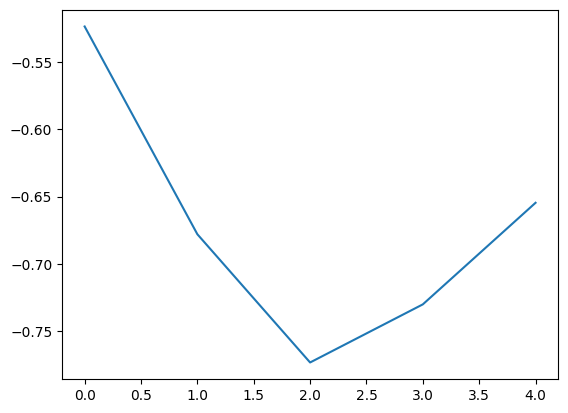

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

* 横坐标（X轴）：代表时间步，共计5个时间步。
* 纵坐标（Y轴）：代表在每个时间步的最后一个特征的值。也就是“预测结果”。（这里没有对标准化的结果进行反向缩放）

In [31]:
preds = np.load("./results/" + setting + "/pred.npy")
trues = np.load("./results/" + setting + "/true.npy")

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((7008, 5, 1), (7008, 5, 1))

下面我们用同样的方式，看一下不同批次（10.20.30批次）的预测结果和真实值对比。

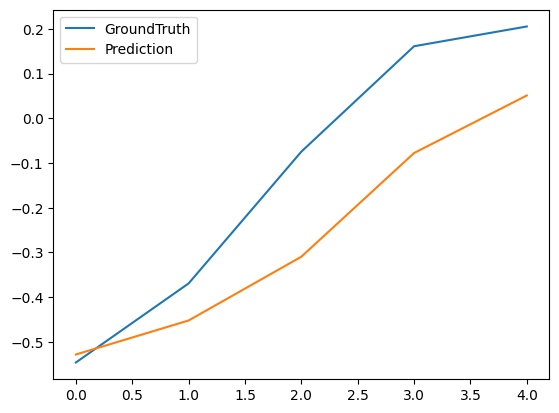

In [32]:
plt.figure()
plt.plot(trues[10, :, -1], label="GroundTruth")
plt.plot(preds[10, :, -1], label="Prediction")
plt.legend()
plt.show()

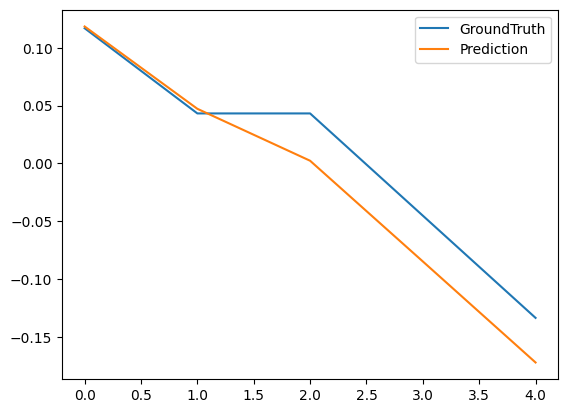

In [33]:
plt.figure()
plt.plot(trues[20, :, -1], label="GroundTruth")
plt.plot(preds[20, :, -1], label="Prediction")
plt.legend()
plt.show()

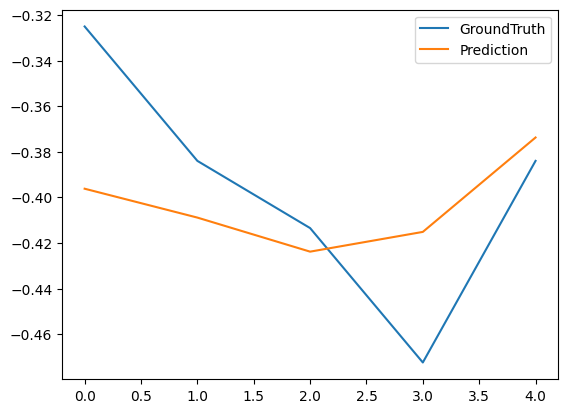

In [34]:
plt.figure()
plt.plot(trues[30, :, -1], label="GroundTruth")
plt.plot(preds[30, :, -1], label="Prediction")
plt.legend()
plt.show()

最后我们看一下所以批次数据的对比结果。

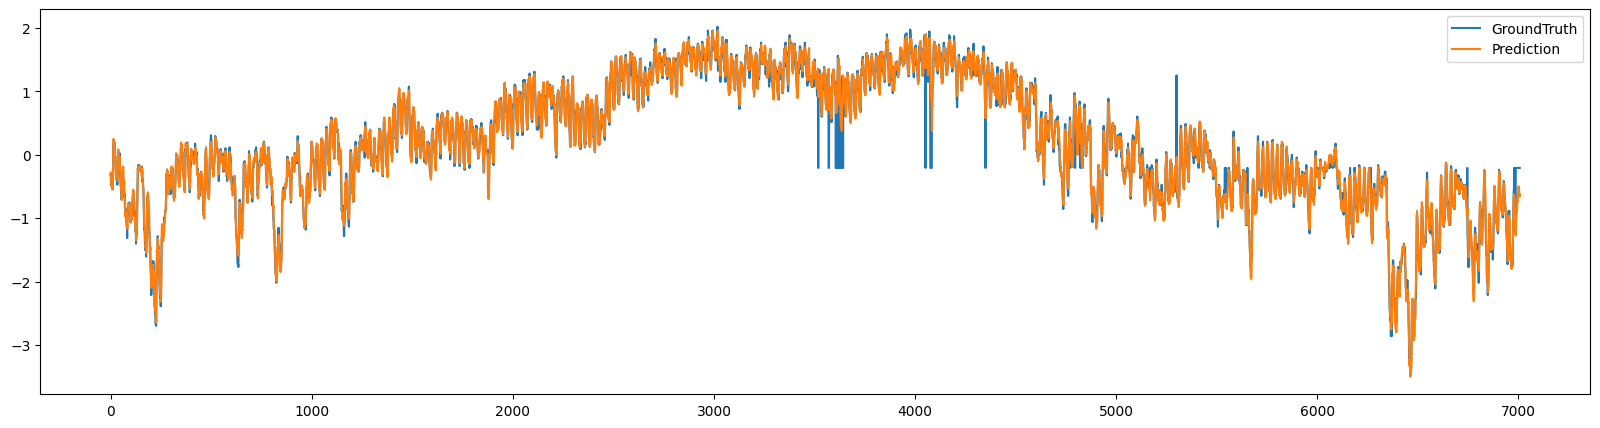

In [35]:
plt.figure(figsize=(20, 5))

plt.plot(trues[:, 0, -1].reshape(-1), label="GroundTruth")
plt.plot(preds[:, 0, -1].reshape(-1), label="Prediction")
plt.legend()
plt.show()
